# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of testing examples.
n_test = len(y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(set(y_test))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

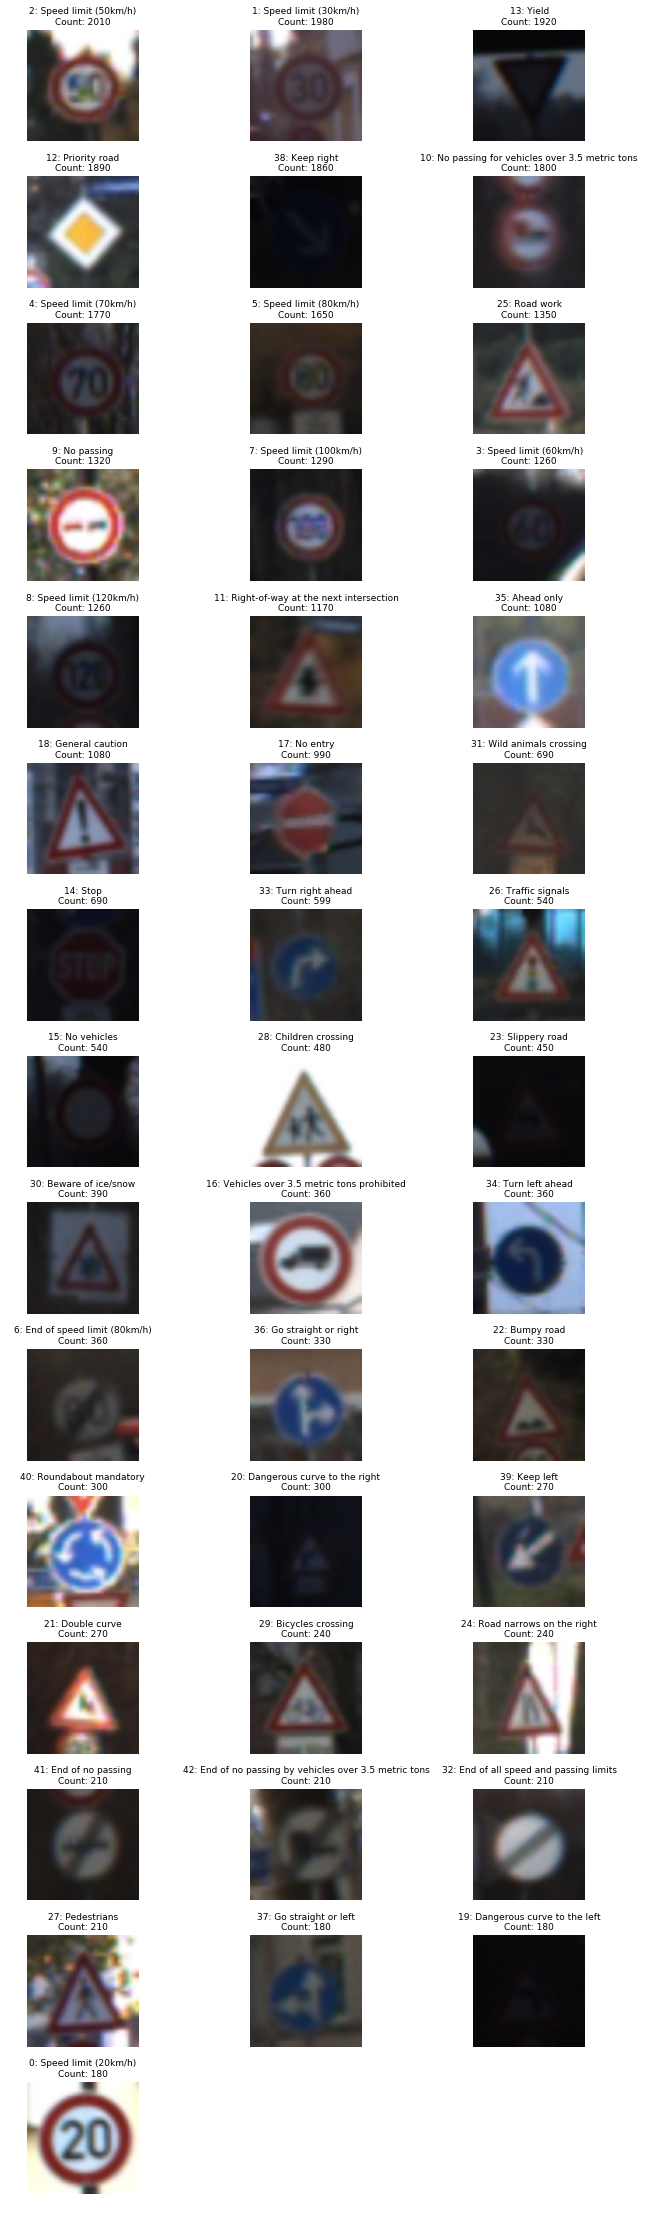

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from collections import Counter

# Visualizations will be shown in the notebook.
%matplotlib inline
plt.style.use('ggplot')

num_rows = 15
num_cols = 3
#random.choices(range(0, len(X_train)), k=num_rows*num_cols)
signnames = dict()
with open('signnames.csv') as signs:
    line = signs.readline()
    while line:
        line = signs.readline()
        if ',' in line:
            k, v = line.strip().split(',')
            signnames[int(k)] = v
            
# Count number of each type of sign in the training set
cnts = sorted(Counter(y_train).items(),
              key=lambda x: x[1],
              reverse=True)
indices = [np.where(y_train==k)[0][5] for k in signnames.keys()]

# http://stackoverflow.com/questions/22053274/grid-of-images-in-matplotlib-with-no-padding
fig = plt.figure(figsize=(10, 40))
gs = gridspec.GridSpec(num_rows, num_cols, wspace=1)
ax = [plt.subplot(gs[i]) for i in range(num_rows*num_cols)]
i = 0
for d in cnts:
    image = X_train[indices[d[0]]].squeeze()
    # We apply gaussian interpolation to make the image more natural
    # to human eyes
    ax[i].imshow(image, interpolation='gaussian')
    ax[i].set_title("{}: {}\nCount: {}".format(d[0], 
                                               signnames[d[0]], 
                                               d[1]),
                    fontdict={'fontsize': 9})
    ax[i].axis('off')
    i += 1
ax[43].axis('off')
ax[44].axis('off');

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [4]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** I didn't perform much preprocessing on the data outside of what's done below.

In [5]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

In [6]:
# Rotation function
def rotate(image):
    return image.rotate(np.random.choice(range(-20,20,5)))

# Color balance enhancer
def color(image):
    enhancer = ImageEnhance.Color(image)
    return enhancer.enhance(np.random.randint(7,11)/10)

# Contrast enhancer
def contrast(image):
    enhancer = ImageEnhance.Contrast(image)
    return enhancer.enhance(np.random.randint(7,11)/10)

# Brightness enhancer
def brightness(image):
    enhancer = ImageEnhance.Brightness(image)
    return enhancer.enhance(np.random.randint(7,11)/10)

# Sharpness enhancer
def sharpness(image):
    enhancer = ImageEnhance.Sharpness(image)
    return enhancer.enhance(np.random.randint(7,14)/10)

In [7]:
# Image transformer
def transform(image):
    return sharpness(brightness(contrast(color(rotate(image)))))

In [8]:
# Use multiprocessing to enhance/process the images
import multiprocessing
from tqdm import tnrange, tqdm_notebook
from PIL import Image, ImageEnhance

num_of_cores = multiprocessing.cpu_count()
p = multiprocessing.Pool(num_of_cores)

# Transform each image 10 times
rounds = 10
enhanced_images = p.map(Image.fromarray, X_train)
labels = y_train.copy()
for i in tnrange(rounds):
    images = p.imap(Image.fromarray, X_train)
    enhanced_images.extend(p.map(transform, images))
    labels = np.append(labels, y_train)

In [9]:
# Convert images to numpy arrays
X_train2 = np.array(p.map(np.asarray, enhanced_images))

# Need to shuffle again
X_train2, y_train2 = shuffle(X_train2, labels)

In [10]:
# We first split the X_train into a training and validation set,
# using 95% of the data for training and 5% for validation.
from sklearn.model_selection import train_test_split
X_tn, X_val, y_tn, y_val = train_test_split(X_train2, y_train2,
                                            test_size=0.05,
                                            random_state=42, 
                                            stratify=y_train2)

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:** The testing and training data are provided as a part of the project. Before taking out a hold-out set from the training set for validation purposes, we generate additional training data by transforming the images in the training set. The tranformations used are:
- rotation
- color
- contrast
- brightness
- sharpness

We apply the transformations randomly to each image, and repeat this 10 times. Altogether, we have 11 times the original number of images.

We generate these additional data to help the network learn that the traffic sign classification are invariant under small rotations and image enhancements.

After adding these transformed images, we separate out a hold-out set consisting of 5% of the total images in the training set, stratified so each type of the 43 signs is represented proportionally.

In [11]:
### Define your architecture here.
### Feel free to use as many code cells as needed.
import tensorflow as tf

EPOCHS = 250
BATCH_SIZE = 3000

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)

In [12]:
# LeNet
def LeNet(x, keep_prob):    
    # Arguments used for tf.truncated_normal.
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x9.
    F_W1 = tf.Variable(tf.truncated_normal((5, 5, 3, 9), 
                                           mean=mu,
                                           stddev=sigma))
    F_b1 = tf.Variable(tf.zeros((9,)))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    C1 = tf.nn.conv2d(x, F_W1, strides, padding) + F_b1
    # Relu activation.
    C1 = tf.nn.relu(C1, 'C1')
    
    # Pooling. Input = 28x28x9. Output = 14x14x9.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    S2 = tf.nn.max_pool(C1, 
                        ksize=ksize, 
                        strides=strides, 
                        padding='VALID')
    
    # Layer 2: Convolutional. Output = 10x10x32.
    F_W2 = tf.Variable(tf.truncated_normal((5, 5, 9, 32),
                                           mean=mu,
                                           stddev=sigma))
    F_b2 = tf.Variable(tf.zeros(32,))
    strides = [1, 1, 1, 1]
    padding = 'VALID'
    C3 = tf.nn.conv2d(S2, F_W2, strides, padding) + F_b2
    # Relu activation.
    C3 = tf.nn.relu(C3, 'C3')
    
    # Pooling. Input = 10x10x32. Output = 5x5x32.
    ksize = [1, 2, 2, 1]
    strides = [1, 2, 2, 1]
    S4 = tf.nn.max_pool(C3,
                        ksize=ksize,
                        strides=strides,
                        padding='VALID')
    
    # Flatten. Input = 5x5x32. Output = 800.
    C5 = tf.contrib.layers.flatten(S4)
    
    # Layer 3: Fully Connected. Input = 800. Output = 300.
    F_W3 = tf.Variable(tf.truncated_normal((800, 300),
                                            mean=mu,
                                            stddev=sigma))
    F_b3 = tf.Variable(tf.zeros(300,))
    C5 = tf.add(tf.matmul(C5, F_W3), F_b3)
    # Relu activation.
    C5 = tf.nn.relu(C5)
    
    # Layer 4: Fully Connected. Input = 300. Output = 150.
    F_W4 = tf.Variable(tf.truncated_normal((300, 150),
                                           mean=mu,
                                           stddev=sigma))
    F_b4 = tf.Variable(tf.zeros(150,))
    F6 = tf.add(tf.matmul(C5, F_W4), F_b4)
    # Relu activation.
    F6 = tf.nn.relu(F6)
    # Apply dropout.
    F6 = tf.nn.dropout(F6, keep_prob)

    # Layer 5: Fully Connected. Input = 150. Output = 43.
    F_W5 = tf.Variable(tf.truncated_normal((150, n_classes),
                                           mean=mu,
                                           stddev=sigma))
    F_b5 = tf.Variable(tf.zeros(n_classes,))
    logits = tf.add(tf.matmul(F6, F_W5), F_b5)
    # Relu activation.
    return logits

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:** I used the LeNet architecture with drop-out before the output layer. The parameters are adjusted so each convolution layer is  wider and deeper to account for the increased depth in the input.

input (32x32x3) -> conv2d (28x28x9) -> maxpooling (14x14x9) -> conv2d (10x10x32) -> maxpooling (5x5x32) -> fully connected (800) -> fuly connected (300) -> fully connected (150) -> dropout -> fully connected (43) -> output

In [13]:
### Train your model here.
### Feel free to use as many code cells as needed.
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, n_classes)

keep_prob = tf.placeholder(tf.float32)

In [14]:
rate = 0.001

logits = LeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=logits, 
                                                        labels=one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

In [15]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

def classify(X_data, k):
    if len(X_data.shape) == 3:
        X_data = np.expand_dims(X_data, 0)
    num_examples = len(X_data)
    classifications = []
    top_k = []
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x = X_data[offset:offset+BATCH_SIZE]
        top_k.append(sess.run(tf.nn.top_k(tf.nn.softmax(logits), k=k), feed_dict={x: batch_x, keep_prob: 1}))
        classifications.extend(top_k[-1].indices[:,0])
    return classifications, top_k

In [16]:
run_model = input('Run model again:\n')
if run_model == 'Y':
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        num_examples = len(X_tn)
    
        print("Training...\n")
        for i in tnrange(EPOCHS):
            X_tn, y_tn = shuffle(X_tn, y_tn)
            for offset in range(0, num_examples, BATCH_SIZE):
                end = offset + BATCH_SIZE
                batch_x, batch_y = X_tn[offset:end], y_tn[offset:end]
                sess.run(training_operation, feed_dict={x: batch_x, 
                                                        y: batch_y, 
                                                        keep_prob: 0.5})
            
            validation_accuracy = evaluate(X_val, y_val)
            if (i+1) % 10 == 0:
                print("EPOCH {} ...".format(i+1))
                print("Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        
        saver.save(sess, './sign_detection')
        print("Model saved")

Run model again:
No


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer:** I used the AdamOptimizer as was done in the LeNet lab. I trained the network 250 epochs and with a batch size of 3000. The dropout is set at 0.5.

In [17]:
# Evaluate against test set
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.953


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:** I started with LeNet and scaled up the width and depth of the layers since the images in the training set are not converted to grayscale but the rgb images are used. (This makes sense since color is a key distinguishing characteristic of the signs). 

In addition, I also created new images by transforming the training images using rotations and other image enhancements such as brightness, color balance, contrast, and sharpness adjustments. This is to help the network learn that the signs are invariant under rotations and these other image enhancements. To elaborate, we saw in section 1 that the images exhibit a variety of brightness, contrast, sharpness, and color balance; these are noises that mislead the network from learning the actual features that identify the signs, such as shape, color, text on the sign, etc. Including the transformed images help to migitate this noise and help the network to learn the actual signals.

I felt LeNet was suitable because it worked well in a similar image identification problem, namely MNIST digit classification. The input to LeNet in that case was also 32x32, although it was in grayscale and not in color. So I thought it's a good starting point (plus it was recommended in the lesson).

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [18]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import pathlib
def view_and_classify(image_folder):
    p = pathlib.Path(image_folder)
    pix = []
    actual_sign = []
    for file in p.iterdir():
        try:
            actual_sign.append(signnames[int(file.name.split('_')[0])])
        except ValueError:
            actual_sign.append('Other')
        pix.append(np.asarray(Image.open(file)))
    pix = np.array(pix)
    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        clf, top_k = classify(pix, 5)
        
    # Track error rate
    correct_count = 0
    incorrect_count = 0
    
    # Visualize
    n_cols = 3
    n_rows = int(np.ceil(len(pix)/n_cols))
    fig = plt.figure(figsize=(10, len(pix)))
    gs = gridspec.GridSpec(n_rows, n_cols, wspace=1)
    ax = [plt.subplot(gs[i]) for i in range(n_rows*n_cols)]
    for i, pic in enumerate(pix):
        pred_sign = signnames[clf[i]]
        if pred_sign == actual_sign[i]:
            correct_count += 1
        else:
            incorrect_count += 1
        ax[i].imshow(pic, interpolation='gaussian')
        ax[i].axis('off')
        ax[i].set_title('Predicted: {}\nActual: {}'.format(pred_sign, 
                                                           actual_sign[i]),
                        fontdict={'fontsize': 9})
    while i % 3 != 0:
        ax[i].axis('off')
        i += 1
    print("Correctly classified: {}".format(correct_count))
    print("Incorrectly classified: {}".format(incorrect_count))
    print("Accuracy: {:.3f}".format(correct_count/(correct_count+incorrect_count)))
    return top_k

Correctly classified: 21
Incorrectly classified: 5
Accuracy: 0.808


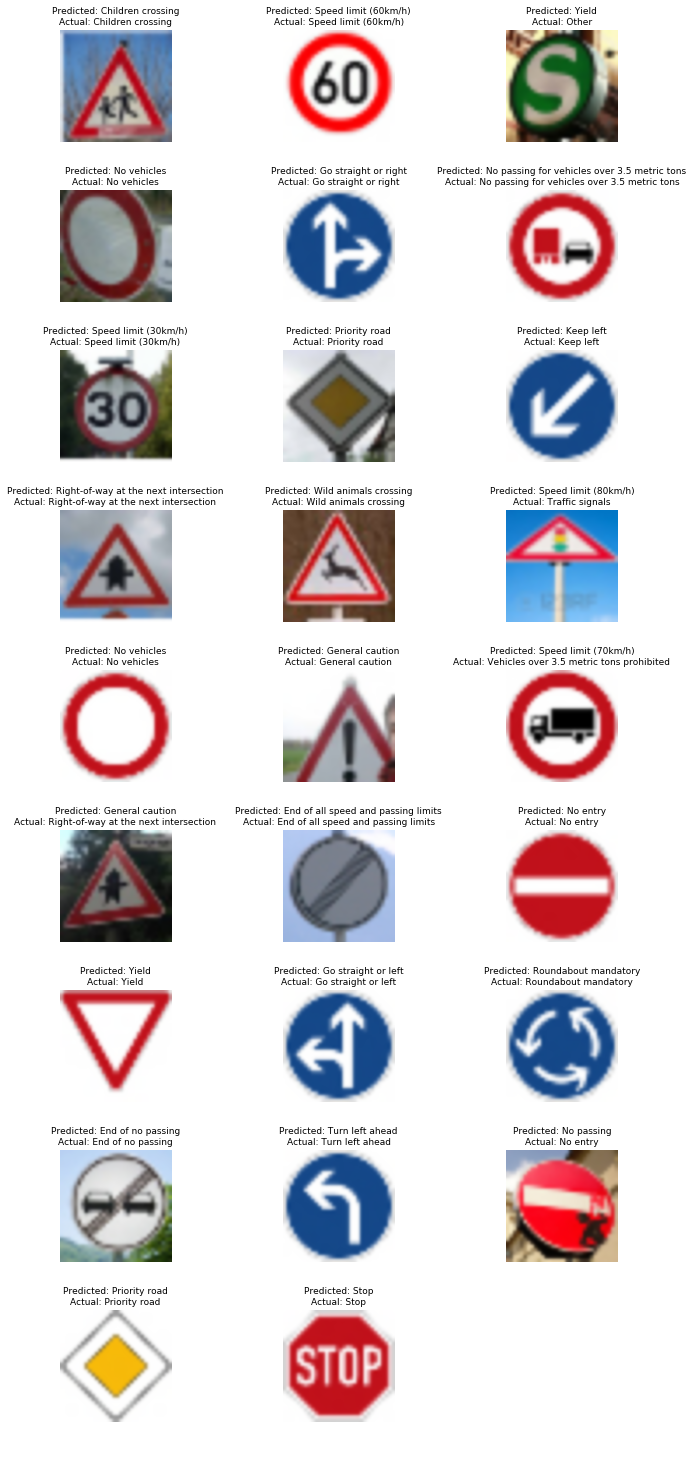

In [19]:
new_top_k = view_and_classify('additional_signs')

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I chose a number of images of German road signs from the web. Let's look at the last five. The neural network correctly identified all but one of these. The one that it misidentified (the "no entry" sign with a man's figure) has a lot of noise in the background as well as on the image itself that fooled the neural network.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:** The model performed essentially equally well among all the traffic signs. The only traffic sign that's identified with less than 70% accuracy is the "pedestrian" sign, which was identified with 51.7% accuracy.

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    clf, top_k = classify(X_test, 5)
accuracies = {}
for i in range(43):
    accuracies[i] = [int(clf[j] == i) for j in range(len(y_test)) if y_test[j] == i]
for k, v in accuracies.items():
    print('{}: {:.3f}'.format(signnames[k], sum(v)/len(v)))

Speed limit (20km/h): 0.883
Speed limit (30km/h): 0.976
Speed limit (50km/h): 0.965
Speed limit (60km/h): 0.971
Speed limit (70km/h): 0.955
Speed limit (80km/h): 0.919
End of speed limit (80km/h): 0.767
Speed limit (100km/h): 0.889
Speed limit (120km/h): 0.949
No passing: 0.983
No passing for vehicles over 3.5 metric tons: 0.976
Right-of-way at the next intersection: 0.990
Priority road: 0.981
Yield: 0.993
Stop: 1.000
No vehicles: 0.995
Vehicles over 3.5 metric tons prohibited: 0.993
No entry: 0.978
General caution: 0.915
Dangerous curve to the left: 1.000
Dangerous curve to the right: 0.856
Double curve: 0.789
Bumpy road: 0.883
Slippery road: 0.960
Road narrows on the right: 0.778
Road work: 0.931
Traffic signals: 0.983
Pedestrians: 0.517
Children crossing: 0.927
Bicycles crossing: 1.000
Beware of ice/snow: 0.827
Wild animals crossing: 0.967
End of all speed and passing limits: 1.000
Turn right ahead: 0.995
Turn left ahead: 0.983
Ahead only: 0.974
Go straight or right: 0.942
Go straig

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [21]:
print(new_top_k[0].values)

[[  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   1.30328528e-31   2.05399055e-36   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00]
 [  1.0000

In [22]:
# Softmax where the 2nd highest probability is greater than 0
for i, value in enumerate(new_top_k[0].values):
    if value[1] > 0.0:
        print("{}: {}".format(i, value))

2: [  1.00000000e+00   1.30328528e-31   2.05399055e-36   0.00000000e+00
   0.00000000e+00]
11: [  1.00000000e+00   5.55710728e-20   2.72168508e-30   6.74953876e-36
   0.00000000e+00]
14: [  9.99984741e-01   1.52114226e-05   1.17039523e-14   1.04356340e-14
   1.02813664e-15]
15: [  9.99779403e-01   2.19177222e-04   7.86318594e-07   6.54599717e-07
   5.17693631e-11]
16: [  1.00000000e+00   1.51007248e-10   7.11411532e-32   7.85499581e-37
   0.00000000e+00]
23: [  9.99999166e-01   8.40450866e-07   1.29793715e-29   0.00000000e+00
   0.00000000e+00]


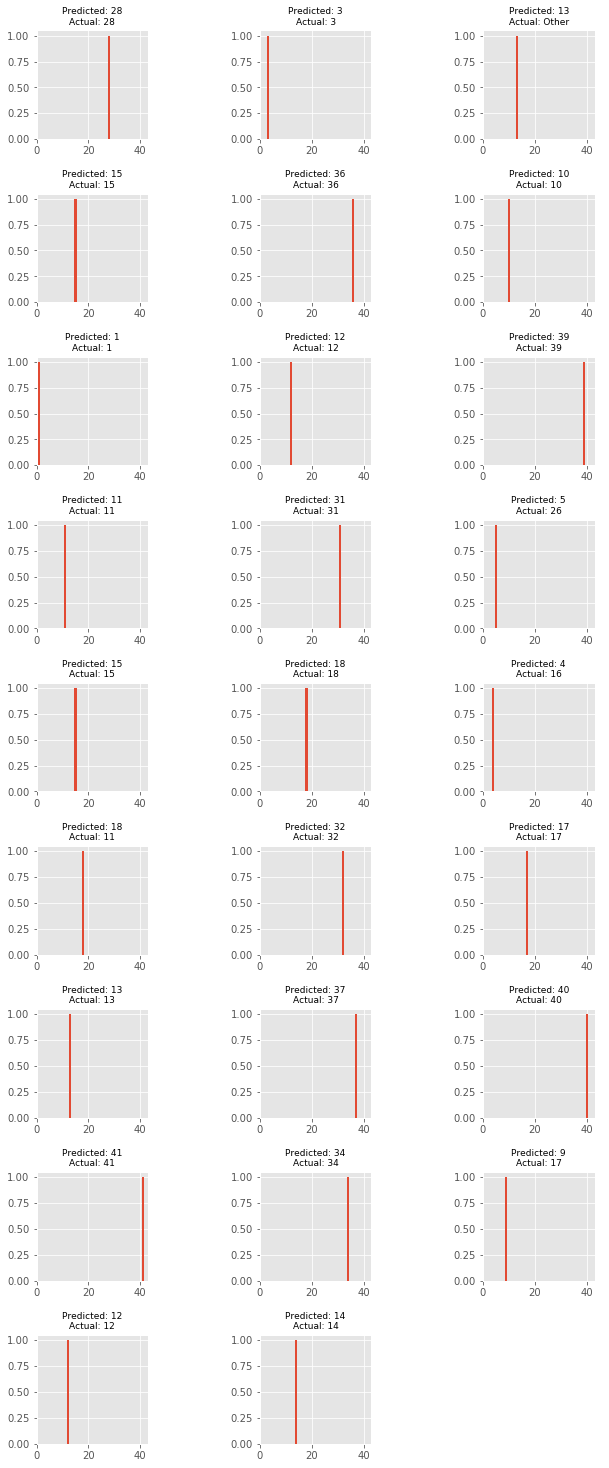

In [23]:
# Plot
p = pathlib.Path('additional_signs')
actuals= []
for file in p.iterdir():
    try:
        actuals.append(int(file.name.split('_')[0]))
    except ValueError:
        actuals.append('Other')

n_cols = 3
n_rows = int(np.ceil(26/n_cols))
fig = plt.figure(figsize=(10, 26))
gs = gridspec.GridSpec(n_rows, n_cols, wspace=1, hspace=0.5)
ax = [plt.subplot(gs[i]) for i in range(n_rows*n_cols)]
#plt.subplots_adjust(top=1.5, bottom=0, hspace=1)
for i, value in enumerate(new_top_k[0].values):
    ax[i].bar(new_top_k[0].indices[i], value)
    ax[i].set_xlim(0, 43)
    ax[i].set_title('Predicted: {}\nActual: {}'.format(new_top_k[0].indices[i][0],
                                                       actuals[i]), fontdict={'fontsize': 9})
ax[26].axis('off');

In [24]:
misclassified = [3, 12, 15, 16, 24]
for i in misclassified:
    signs = map(lambda a: signnames[a], new_top_k[0].indices[i-1])
    print('{}: '.format(i), ', '.join(signs))

3:  Yield, Turn left ahead, Ahead only, Speed limit (20km/h), Speed limit (30km/h)
12:  Speed limit (80km/h), Speed limit (50km/h), Road work, Speed limit (70km/h), Speed limit (20km/h)
15:  Speed limit (70km/h), Vehicles over 3.5 metric tons prohibited, Wild animals crossing, Speed limit (80km/h), Go straight or left
16:  General caution, Right-of-way at the next intersection, Dangerous curve to the right, Speed limit (30km/h), Slippery road
24:  No passing, No entry, No passing for vehicles over 3.5 metric tons, Speed limit (20km/h), Speed limit (30km/h)


**Answer:** Of the new images from section 6, we see most of the signs classified correctly had probability 1 (under np.float32 precision). There are six cases where the second highest softmax is greater than 0, and five of these are misclassified. For the signs that are mis-classified (the third, 12th, 15th, 16th, and 24th), we see that the second highest classification is correct except for the third sign, which is not a German traffic sign, and the 12th sign, which is tilted and has a large background that makes it difficult to classify correctly.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.